In [1]:
from Config import Config, plot_rewards
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import Agent
import d2l.torch as d2l
import torch

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


状态空间维度：4，动作空间维度：2
开始训练！
回合：20/600，奖励：18.00，评估奖励：18.20，最佳评估奖励：18.20，更新模型！ 0.35
回合：40/600，奖励：19.00，评估奖励：18.80，最佳评估奖励：18.80，更新模型！ 0.17
回合：60/600，奖励：22.00，评估奖励：18.20，最佳评估奖励：18.80，0.10
回合：80/600，奖励：13.00，评估奖励：19.60，最佳评估奖励：19.60，更新模型！ 0.07
回合：100/600，奖励：15.00，评估奖励：29.60，最佳评估奖励：29.60，更新模型！ 0.06
回合：120/600，奖励：23.00，评估奖励：18.80，最佳评估奖励：29.60，0.05
回合：140/600，奖励：20.00，评估奖励：25.20，最佳评估奖励：29.60，0.05
回合：160/600，奖励：17.00，评估奖励：18.80，最佳评估奖励：29.60，0.05
回合：180/600，奖励：22.00，评估奖励：22.40，最佳评估奖励：29.60，0.05
回合：200/600，奖励：15.00，评估奖励：21.00，最佳评估奖励：29.60，0.05
回合：220/600，奖励：15.00，评估奖励：18.80，最佳评估奖励：29.60，0.05
回合：240/600，奖励：19.00，评估奖励：19.20，最佳评估奖励：29.60，0.05
回合：260/600，奖励：21.00，评估奖励：28.00，最佳评估奖励：29.60，0.05
回合：280/600，奖励：36.00，评估奖励：25.80，最佳评估奖励：29.60，0.05
回合：300/600，奖励：16.00，评估奖励：28.00，最佳评估奖励：29.60，0.05
回合：320/600，奖励：21.00，评估奖励：26.00，最佳评估奖励：29.60，0.05
回合：340/600，奖励：33.00，评估奖励：34.20，最佳评估奖励：34.20，更新模型！ 0.05
回合：360/600，奖励：54.00，评估奖励：34.60，最佳评估奖励：34.60，更新模型！ 0.05
回合：380/600，奖励：51.00，评估奖励：36.40，最佳评估奖励：36.40，更新模型！ 0.05
回合：400/

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


回合：1/20，奖励：200.00
回合：2/20，奖励：190.00
回合：3/20，奖励：200.00
回合：4/20，奖励：135.00
回合：5/20，奖励：137.00
回合：6/20，奖励：170.00
回合：7/20，奖励：187.00
回合：8/20，奖励：170.00
回合：9/20，奖励：103.00
回合：10/20，奖励：177.00
回合：11/20，奖励：188.00
回合：12/20，奖励：158.00
回合：13/20，奖励：200.00
回合：14/20，奖励：200.00
回合：15/20，奖励：159.00
回合：16/20，奖励：172.00
回合：17/20，奖励：150.00
回合：18/20，奖励：200.00
回合：19/20，奖励：200.00
回合：20/20，奖励：130.00
完成测试


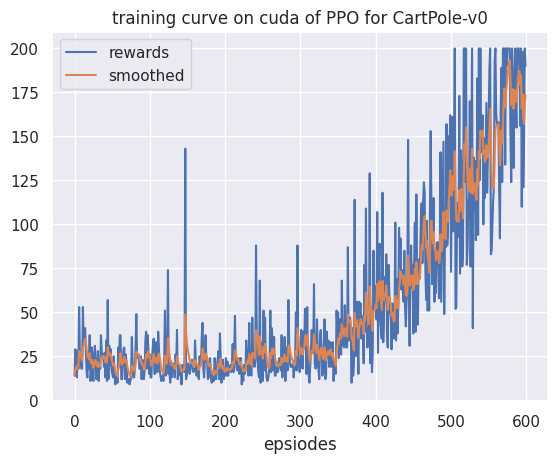

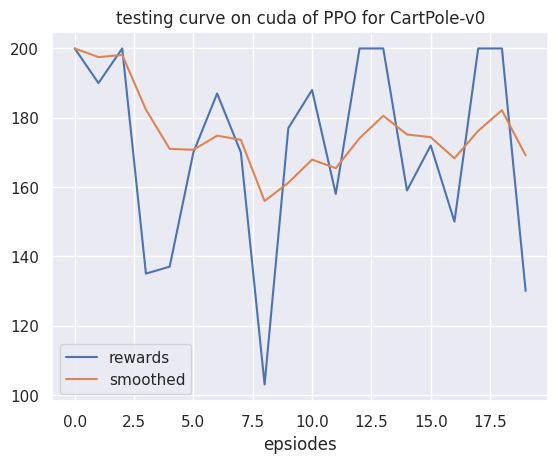

In [2]:
# 获取参数
cfg = Config()
# 训练
env, agent = env_agent_config(cfg)
best_agent,res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], cfg, tag="train")  
# 测试
res_dic = test(cfg, env, best_agent)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

In [3]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = best_agent
draw_agent.actor.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actor_out = []
actions = []
critic_list = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action = draw_agent.predict_action(state)
        actor_out.append(draw_agent.actor(to_tensor(state, cfg)))
        actions.append(action)
        critic_list.append(draw_agent.critic(to_tensor(state, cfg)))
        state, reward, done, _ = env.step(action)
        atten_std.append(draw_agent.actor.atten.cpu().detach().numpy().std())

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

for i in range(len(actor_out)):
    print(actions[i],critic_list[i].detach().cpu()[0],actor_out[i].detach().cpu()[0])
draw_agent.actor.train()
print("length of actions is ", len(actions))


1 tensor(44.9769) tensor([0.7015, 0.2985])
0 tensor(45.6958) tensor([0.9352, 0.0648])
0 tensor(44.9632) tensor([0.6511, 0.3489])
1 tensor(44.2112) tensor([0.0454, 0.9546])
0 tensor(44.9100) tensor([0.5729, 0.4271])
1 tensor(44.1546) tensor([0.0400, 0.9600])
0 tensor(44.8496) tensor([0.3120, 0.6880])
1 tensor(44.0903) tensor([0.0348, 0.9652])
0 tensor(44.7806) tensor([0.1693, 0.8307])
1 tensor(44.0168) tensor([0.0297, 0.9703])
1 tensor(44.7018) tensor([0.1176, 0.8824])
0 tensor(45.4035) tensor([0.8375, 0.1625])
1 tensor(44.6534) tensor([0.0885, 0.9115])
0 tensor(45.3532) tensor([0.7922, 0.2078])
1 tensor(44.6009) tensor([0.0699, 0.9301])
0 tensor(45.2981) tensor([0.7301, 0.2699])
1 tensor(44.5429) tensor([0.0560, 0.9440])
0 tensor(45.2367) tensor([0.6402, 0.3598])
1 tensor(44.4780) tensor([0.0438, 0.9562])
0 tensor(45.1675) tensor([0.3725, 0.6275])
1 tensor(44.4043) tensor([0.0341, 0.9659])
1 tensor(45.0886) tensor([0.1621, 0.8379])
0 tensor(45.7895) tensor([0.8578, 0.1422])
1 tensor(45

tensor([[[[5.9892e-07, 2.3472e-07, 1.2455e-01, 2.6742e-05, 2.9448e-05,
           1.1075e-06, 3.9065e-04, 6.9811e-07]]]], grad_fn=<ToCopyBackward0>)

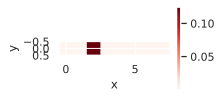

In [4]:
d2l.show_heatmaps(draw_agent.actor.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.actor.atten.view(1, 1, 1, 8).cpu()

In [5]:
# torch.save(best_agent, './Data/CartPole-v0-StateAttention-None/Ex1.pt')

/home/wyq/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# draw_agent.actor.atten.std()

In [ ]:
# import numpy as np
# atten_std = np.array(atten_std)
# np.save('./Data/CartPole-v0-StateAttention-None/atten_std_600-600', atten_std)
# atten_std.mean()

In [ ]:
# torch.save(cfg, './Data/CartPole-v0-StateAttention-None/XXX-600_cfg.pt')